In [1]:
from numpy import fft as fft
import numpy as np
import matplotlib.pyplot as plt

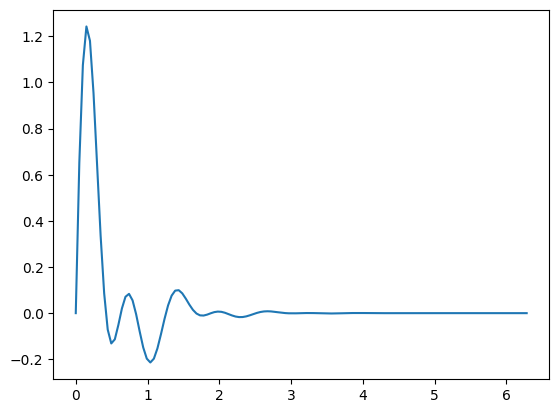

In [54]:
x = np.linspace(0,2*np.pi, 128)
a = .5
y = np.exp(-x/a)*(np.sin(10*x) + np.sin(5*x))

plt.plot(x,y)
plt.show()

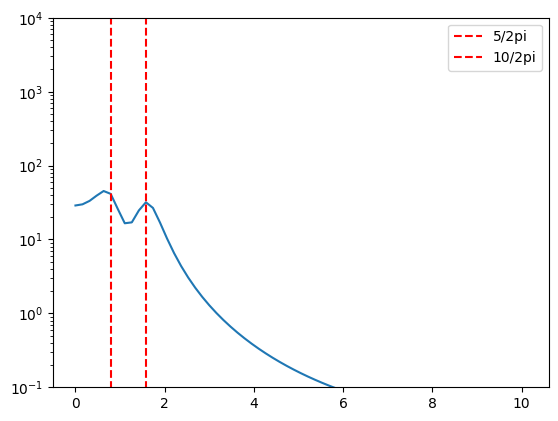

In [55]:
y_fft = fft.rfft(y)
freqs = fft.rfftfreq(len(y), d=x[1]-x[0])
plt.plot(freqs, np.abs(y_fft)**2)
plt.vlines(5/(2*np.pi),0,100000,colors="red", linestyles="--", label="5/2pi")
plt.vlines(10/(2*np.pi),0,100000,colors="red",linestyles="--", label="10/2pi")
plt.legend()
plt.yscale('log')
plt.ylim(1e-1,1e4)
plt.show()